In [1]:
#import module
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from prml import nn

print("import module ....")

import module ....


In [2]:
#define model
class RegressionNetwork(nn.Network):
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = np.arange(n_hidden)
            print("inite w1=", self.w1)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            
            print("inite w2=", self.w2)
            self.b2 = np.zeros(n_output)
            
            
    def __call__(self, x):
#         print("x=" , x)
        h = nn.tanh(x @ self.w1 + self.b1)
#         print("x.shape=", x.shape, "h.shape=", h.shape, "w2.shape=", self.w2.shape)
#         h = nn.tanh(np.dot(x, self.w1) + self.b1)
#         h = nn.tanh(x.dot(self.w1)) + self.b1
        y = h @ self.w2 + self.b2
        return y
        
        
        
    

inite w1= Array(shape=(1, 3), dtype=float32)
inite w2= Array(shape=(3, 1), dtype=float32)


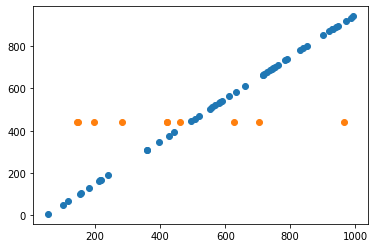

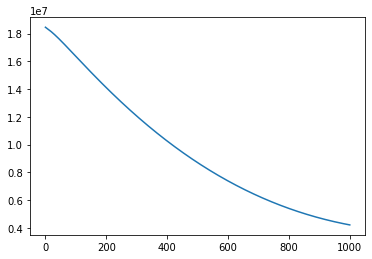

In [9]:
#prepare data and train model
def create_batch_data(batch_size):
   x = np.random.randint(1, 500, size = batch_size )[:, None] * 2
   y = x  - 50
   return x, y

batch_size = 50

iterat_count = 1000

model = RegressionNetwork(1, 3, 1)
optimizer = nn.optimizer.Adam(model.parameter, 0.1)
x_train, y_train = create_batch_data(batch_size)
# print(x_train)
loss_set = []
for i in range(iterat_count): 
    loss = nn.square(y_train - model(x_train)).sum()
    loss_set.append(loss.value)
    optimizer.minimize(loss)
    

# print("w1.value=", model.w1.value, "b1.value=",  model.b1)  

# print("w2.value=", model.w2.value, "b2.value=",  model.b2) 

x_test = np.random.randint(1, 500, size = 10)[:, None] * 2
# print("x_test=", x_test)

y_test = model(x_test).value

# print("x_test", x_test)
# print("y_test=", y_test)


# print(x_test.flatten(), y_test)

#show fit function
plt.figure()

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

#show loss trend
plt.figure()
plt.xlabel("batch_time")
plt.ylabel("loss")
plt.plot(np.linspace(0, iterat_count, len(loss_set)), loss_set)
    